[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Epoch 1/5
34/34 [==============================] - 238s 7s/step - loss: 16.6493 - acc: 0.0480 - val_loss: 3.0249 - val_acc: 0.0891
Epoch 2/5
34/34 [==============================] - 237s 7s/step - loss: 2.9654 - acc: 0.0894 - val_loss: 2.8766 - val_acc: 0.1584
Epoch 3/5
34/34 [==============================] - 251s 7s/step - loss: 2.8103 - acc: 0.1487 - val_loss: 2.6520 - val_acc: 0.2029
Epoch 4/5
34/34 [==============================] - 242s 7s/step - loss: 2.4655 - acc: 0.2879 - val_loss: 1.9704 - val_acc: 0.5302
Epoch 5/5
89/89 [==============================] - 27s 301ms/step - loss: 1.2468 - acc: 0.7077
Evaluation result on Test Data : Loss = 1.247, accuracy = 0.708


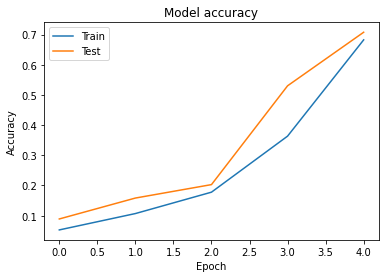

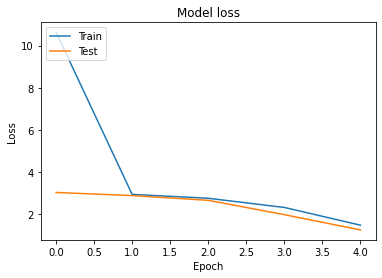

In [1]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from keras.layers import Embedding, Flatten, Dense
from sklearn import preprocessing
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups 
import numpy as np


newsgroups_train = fetch_20newsgroups(subset='train', shuffle=True)
sentences = newsgroups_train.data
y = newsgroups_train.target

print(np.unique(y))

max_review_len = max([len(s.split()) for s in sentences])

#tokenizing data
tokenizer = Tokenizer(num_words=max_review_len)
tokenizer.fit_on_texts(sentences)

vocab_size = len(tokenizer.word_index)+1
#getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)
padded_docs = pad_sequences(sentences,maxlen=max_review_len)

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

# Number of features
# print(input_dim)
model = Sequential()

model.add(Embedding(vocab_size, output_dim = 50, input_length=max_review_len))
model.add(Flatten())

model.add(layers.Dense(300, input_dim=max_review_len, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

[test_loss, test_acc] = model.evaluate(X_test,y_test)
print("Evaluation result on Test Data : Loss = {:0.3f}, accuracy = {:0.3f}".format(test_loss, test_acc))




# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()